In [1]:
import pandas as pd
import numpy as np

from numpy import average


#import the csv to pandas
file_path='/home/itay/salarySurvey/data/form_result.csv'
df =pd.read_csv(file_path)



In [2]:
# enter the coulmns names as varibels:

salary='שכר שעתי במשרת הסטודנט הראשונה (ש"ח לשעה)'
grade='ממוצע (נכון לתקופת חיפוש העבודה)'
bargin='האם התמקחת אחרי קבלת ההצעה?'
gender='מין'
company='חברה (נא לכתוב באנגלית את שם החברה)'

ice_cream='טעם גלידה אהוב'

rounding_density=2

In [3]:
#cleanup to the data, you should add your own cleanup to the data:
df=df.drop(65)
df=df.drop(82)
df=df.drop(104)
df=df.drop(117)

df[df[salary].str.contains("50K",na=False)]
df=df.drop(102)

df[df[salary]=='20']
df=df.drop(148)

df[df[grade].str.contains(" תואר ראשון",na=False)]
df=df.drop(115)



In [4]:
av_df=df[salary].astype(float).sum()/len(df)
av_df

96.12264150943396

In [5]:
#calculate the average value of columnName column in df:
def calculate_average(df,column_name):
    num_of_rows=len(df)
    sum_of_rows=df[column_name].astype(float).sum()
    return sum_of_rows/num_of_rows # return the average value

def calculate_precentage_of_binary_answer(df,column_name,binary_field_answer):
    return len(df[df[column_name]==binary_field_answer])/ len(df)

def create_sorted_average_dict(dict,field):
    average_dict={}
    sorted_dict={}
    #calculate the average:
    for name in dict:
        average_dict[name]=calculate_average(dict[name],field)

    #sort:
    sorted_salary_list=sorted(average_dict.items(), key=lambda x: x[1])

    for tup in sorted_salary_list:
        average_rounded=round(tup[1],rounding_density)
        new_key= tup[0]+str(average_rounded)
        sorted_dict[new_key]=tup[1] 
    return sorted_dict

In [6]:
#calculate average salary and grades:

male_df= df.loc[df[gender]=='זכר']
female_df= df.loc[df['מין']=='נקבה']

average_salary_male = calculate_average(male_df,salary)
average_grade_male = calculate_average(male_df,grade)

average_salary_female = calculate_average(female_df,salary)
average_grade_female = calculate_average(female_df,grade)


In [7]:
#bargin presentage:

precents_of_male_bargin=calculate_precentage_of_binary_answer(male_df,bargin,'כן')
precents_of_female_bargin=calculate_precentage_of_binary_answer(female_df,bargin,'כן')


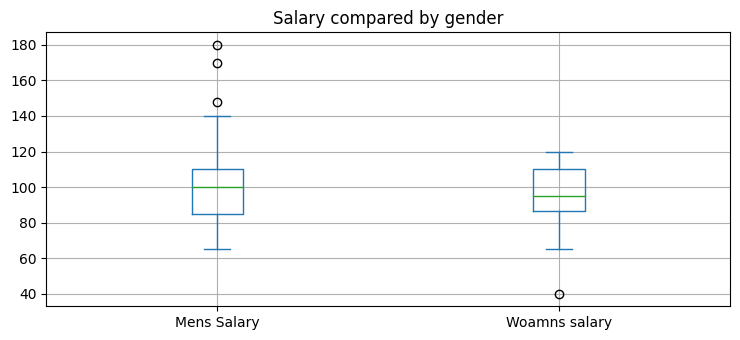

In [8]:
import matplotlib.pyplot as plt
man_salarys=male_df[[salary]].astype(float)
fman_salarys=female_df[[salary]].astype(float)

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
combined_dfs = pd.DataFrame({"Mens Salary": male_df[salary].astype(float), "Woamns salary": female_df[salary].astype(float)})

# Plot the dataframe
ax = combined_dfs[['Mens Salary', 'Woamns salary']].plot(kind='box',grid=True,title='Salary compared by gender')

# Display the plot
plt.show()

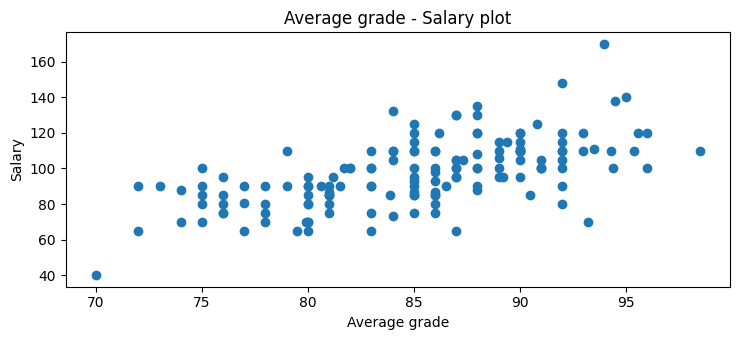

In [9]:
#prepare the scatter points:
scatter_df=df
scatter_df[scatter_df[salary]=='180']
scatter_df=scatter_df.drop(146)

x=scatter_df[grade].astype(float)
y=scatter_df[salary].astype(float)
plt.scatter(x,y)
plt.title("Average grade - Salary plot")
plt.xlabel("Average grade")
plt.ylabel("Salary")
plt.show()

In [10]:
#get the calculate companies average:

companies_dict={}
companies_names=['Intel','Microsoft','Amazon','Google','Facebook','Apple','IBM','Rafael','Elbit','Plus500','Nvidia','Mobileye']

for company_name in companies_names:
    companies_dict[company_name]=df[df[company]==company_name]    

In [11]:

sorted_salaries_companies=create_sorted_average_dict(companies_dict,salary)


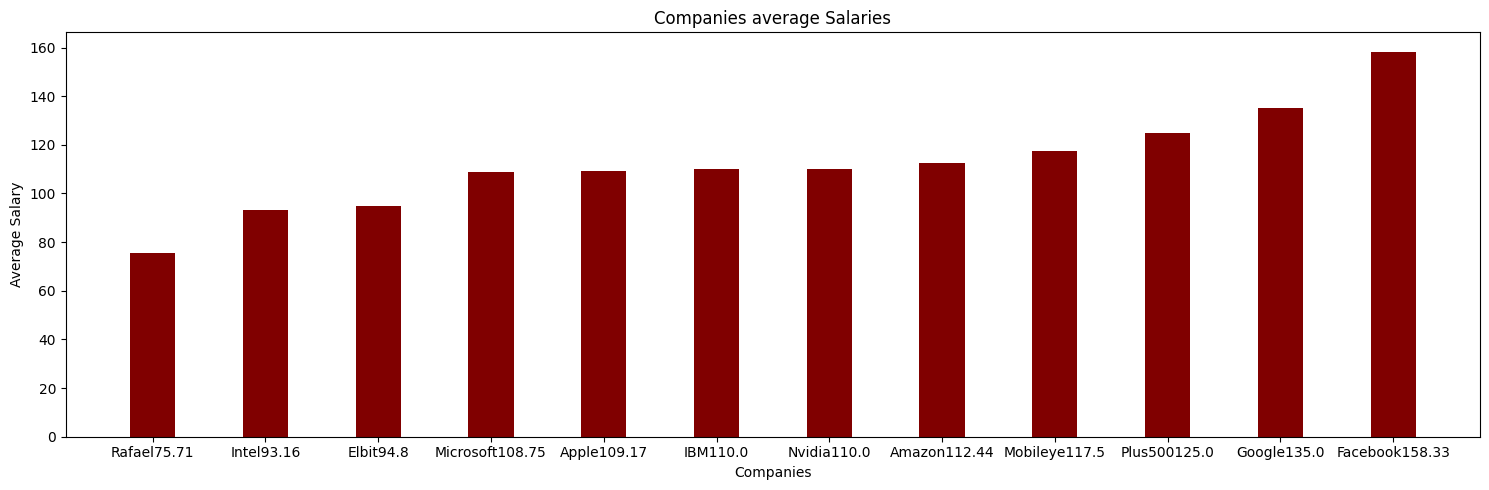

In [12]:
fig=plt.figure(figsize=(15,5))
plt.bar(sorted_salaries_companies.keys(), sorted_salaries_companies.values(), color ='maroon',
        width = 0.4)
 
plt.xlabel("Companies")
plt.ylabel("Average Salary")
plt.title("Companies average Salaries")
plt.show()


In [13]:
ice_cream_df={}
ice_ceam_names=['למרק - חולמ הלגייב','פיסטוק','וניל עוגיות','בצק עוגיות','שוקולד בראוניס']

for ice_cream_name in ice_ceam_names:
    ice_cream_df[ice_cream_name]=df[df[ice_cream]==ice_cream_name]    

In [14]:
sorted_salaries_companies=create_sorted_average_dict(ice_cream_df,salary)


/tmp/ipykernel_12488/400144551.py:5: RuntimeWarning: invalid value encountered in double_scalars
  return sum_of_rows/num_of_rows # return the average value


In [15]:
print(sorted_salaries_companies)

{'למרק - חולמ הלגייבnan': nan, 'וניל עוגיות90.65': 90.65217391304348, 'בצק עוגיות98.94': 98.94, 'פיסטוק100.93': 100.92857142857143, 'שוקולד בראוניס103.92': 103.91666666666667}


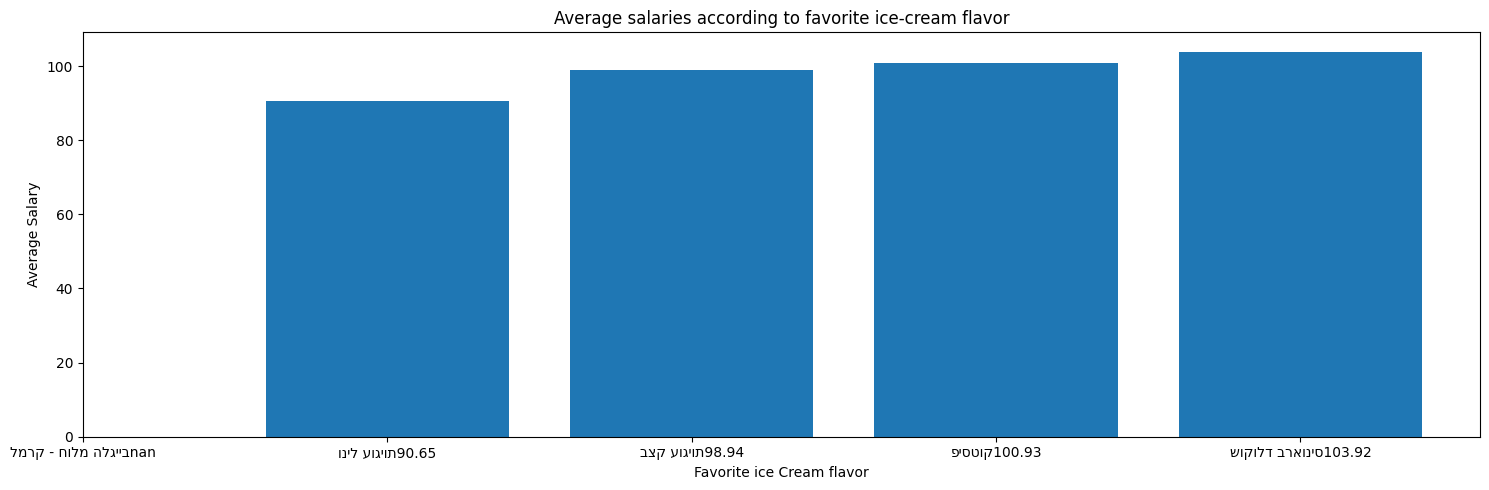

In [16]:
data = sorted_salaries_companies
names = list(data.keys())
values = list(data.values())
fig=plt.figure(figsize=(15,5))



plt.xlabel("Favorite ice Cream flavor")
plt.ylabel("Average Salary")
plt.title("Average salaries according to favorite ice-cream flavor")
plt.bar(range(len(data)), values, tick_label=names)
plt.show()